## Load dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold


X_train_banknote = pd.read_csv("../../input/A2-banknote/banknote_X_train.csv")
X_test_banknote = pd.read_csv("../../input/A2-banknote/banknote_X_test.csv")
y_train_banknote = pd.read_csv("../../input/A2-banknote/banknote_y_train.csv")
y_test_banknote = pd.read_csv("../../input/A2-banknote/banknote_y_test.csv")




## Cross-validation

In [2]:
# the set of parameters defined
kernel_options = ['linear', 'rbf']
C_options = [0.1, 1, 10]

# to store the best model and its performance
best_model = None
best_accuracy = 0
best_params = {}

# 4-fold cross-validation
kf = KFold(n_splits=4)

for kernel in kernel_options:
    for C in C_options:
        cv_accuracy = []

        for train, validation in kf.split(X_train_banknote):
            clf = SVC(kernel=kernel, C=C, random_state=0, probability=True)
            clf.fit(X_train_banknote.iloc[train], y_train_banknote.iloc[train].values.ravel())
            y_pred = clf.predict(X_train_banknote.iloc[validation])
            accuracy = accuracy_score(y_train_banknote.iloc[validation], y_pred)
            cv_accuracy.append(accuracy)
        
        mean_accuracy = np.mean(cv_accuracy)
        print(f"Kernel: {kernel}, C: {C}, Mean CV Accuracy: {mean_accuracy}")

        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model = clf
            best_params = {'kernel': kernel, 'C': C}

print(f"Best Model Parameters: {best_params}, Best Accuracy: {best_accuracy}")

Kernel: linear, C: 0.1, Mean CV Accuracy: 0.98814200398142
Kernel: linear, C: 1, Mean CV Accuracy: 0.9890577305905773
Kernel: linear, C: 10, Mean CV Accuracy: 0.9890577305905773
Kernel: rbf, C: 0.1, Mean CV Accuracy: 0.9881453218314531
Kernel: rbf, C: 1, Mean CV Accuracy: 0.9954379562043795
Kernel: rbf, C: 10, Mean CV Accuracy: 1.0
Best Model Parameters: {'kernel': 'rbf', 'C': 10}, Best Accuracy: 1.0


## Model Training 

In [3]:
# retrain the model using the best parameters on the entire training dataset
best_model.fit(X_train_banknote, y_train_banknote.values.ravel())

# predict on the training set
y_pred_train = best_model.predict(X_train_banknote)

# confusion matrix for the training set [required]
cm_train = confusion_matrix(y_train_banknote, y_pred_train)

# elements of the confusion matrix
n00_train = cm_train[0][0]  # True Negatives
n01_train = cm_train[0][1]  # False Positives
n10_train = cm_train[1][0]  # False Negatives
n11_train = cm_train[1][1]  # True Positives

# classification error calculation for the training set from the document
classification_error_percentage_train = 100 * (n01_train + n10_train) / (n00_train + n11_train + n01_train + n10_train)
print(f"Percentage Classification Error on Training Set: {classification_error_percentage_train}%")


Percentage Classification Error on Training Set: 0.0%


## Test Dataset

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# retrain the model on the entire training set
best_model.fit(X_train_banknote, y_train_banknote.values.ravel())

# predict on the test set
y_pred_test = best_model.predict(X_test_banknote)

# calculate test accuracy
test_accuracy = accuracy_score(y_test_banknote, y_pred_test)
print(f"Accuracy on Test Set: {test_accuracy}")


# display the confusion matrix
cm = confusion_matrix(y_test_banknote, y_pred_test)
print(f"Confussion Matrices: {cm}")

n00 = cm[0][0]
n01 = cm[0][1]
n10 = cm[1][0]  
n11 = cm[1][1]  


# classification error calculation for the training set from the document

classification_error_percentage = 100 * (n01 + n10) / (n00 + n11 + n01 + n10)
print(f"Percentage Classification Error on Test Set: {classification_error_percentage}%")



Accuracy on Test Set: 1.0
Confussion Matrices: [[148   0]
 [  0 127]]
Percentage Classification Error on Test Set: 0.0%


## ROC curve and AUC

AUC Score on Test Set: 1.00%


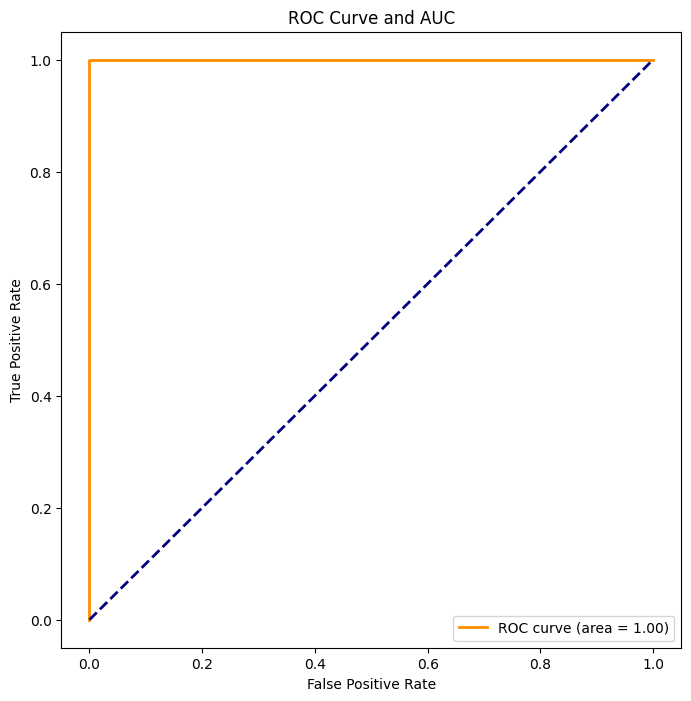

In [5]:
from sklearn.metrics import auc, roc_curve


y_prob = best_model.predict_proba(X_test_banknote)[:, 1]
fpr, tpr, _ = roc_curve(y_test_banknote, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC Score on Test Set: {roc_auc:.2f}%") 


# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC')
plt.legend(loc="lower right")
plt.show()